## Correlation plotting
#### This notebook contains code for exploring the relation between park accessibility and post density
#### Code is for mostly creating scatter plots and exploring different possibilities
#### Not critical for the project, but if you want to recreate the scatter plots or eg. filter the data and see if an correlation exists then, this code should help

In [1]:
# for data wrangling
import geopandas as gpd
import pandas as pd

In [2]:
# for plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = gpd.read_file("C:\\path to file\WDPA_national_parks_acc_dens.shp")

In [4]:
# gdf to df
data_pd = pd.DataFrame(data)

In [5]:
print(len(data_pd))

1967


In [8]:
data_pd.columns

Index(['WDPA_PID', 'NAME', 'ORIG_NAME', 'DESIG', 'DESIG_ENG', 'DESIG_TYPE',
       'MARINE', 'GIS_M_AREA', 'GIS_AREA', 'NO_TAKE', 'NO_TK_AREA', 'STATUS',
       'STATUS_YR', 'GOV_TYPE', 'OWN_TYPE', 'VERIF', 'METADATAID',
       'PARENT_ISO', 'ISO3', 'Land_area', 'acc_stdev', 'acc_count', 'acc_sum',
       'acc_mean', 'acc_median', 'acc_min', 'acc_max', 'acc_range',
       'acc_varian', 'den_id', 'den_GIS_AR', 'den_Land_a', 'den_ISO3',
       'den_region', 'den_regi_1', 'den_Number', 'den_post_d', 'den_post_1',
       'geometry'],
      dtype='object')

In [31]:
data_pd['den_regi_1'].unique()

array(['Africa', 'Latin America and the Caribbean', 'Oceania', 'Asia',
       'Europe', 'Northern America', 'Australia and New Zealand',
       'Greenland'], dtype=object)

In [41]:
data_pd['Land_area'].corr(data_pd['den_Number'])

0.018207012080794165

In [9]:
major_parks = data_pd.loc[(data_pd['den_Number'] > 15) & (data_pd['Land_area'] > 1)]

In [10]:
mp_regions = major_parks.groupby(['den_region'])

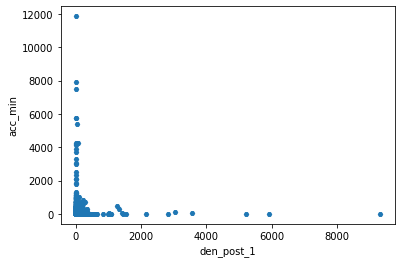

In [24]:
data_pd.plot('den_post_1', 'acc_min', kind='scatter', title="", marker='H')

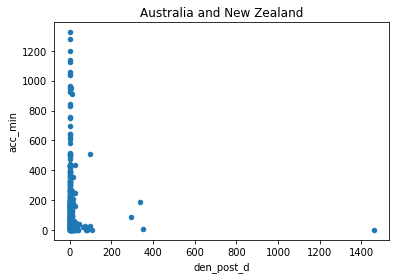

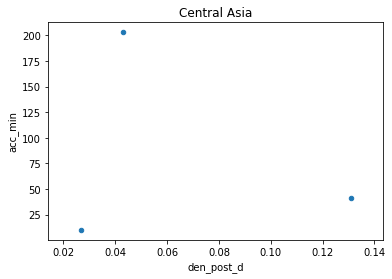

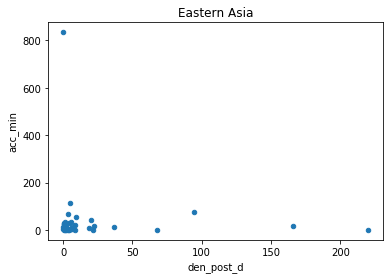

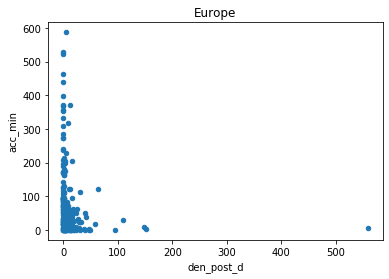

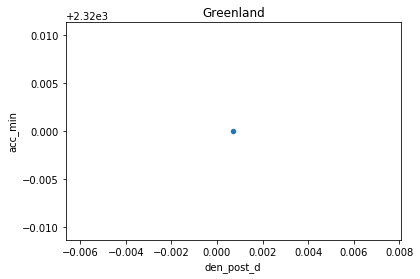

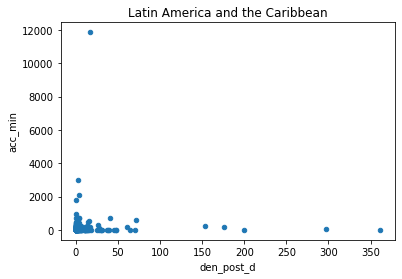

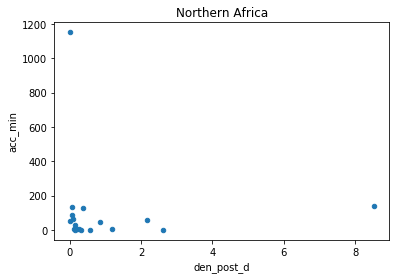

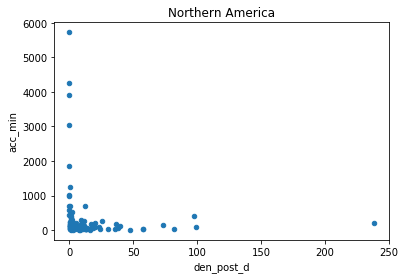

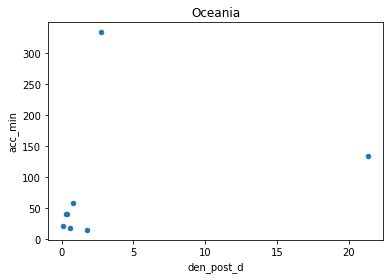

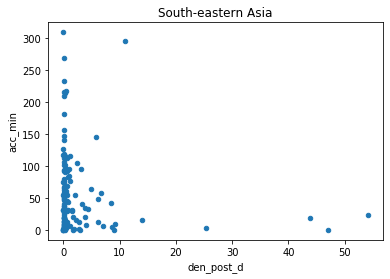

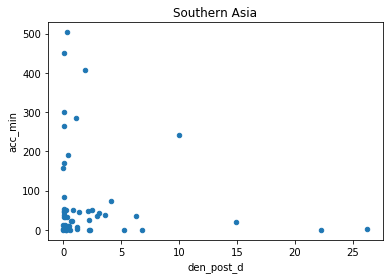

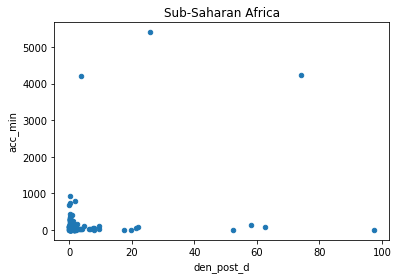

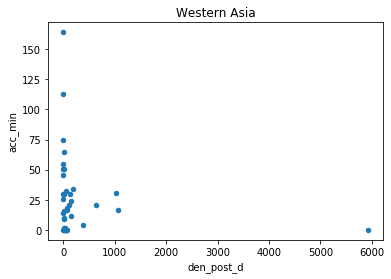

In [11]:
for key, region in mp_regions:
    region.plot('den_post_d', 'acc_min', kind='scatter', title=key)

In [25]:
print(data_pd['den_post_d'].corr(data_pd['acc_min']))

-0.021859328283185327


In [11]:
data['den_region'].unique()

array(['Sub-Saharan Africa', 'Latin America and the Caribbean',
       'Northern Africa', 'Oceania', 'Southern Asia', 'Western Asia',
       'Eastern Asia', 'Central Asia', 'South-eastern Asia', 'Europe',
       'Northern America', 'Australia and New Zealand', 'Greenland'],
      dtype=object)

In [49]:
regions = data_pd.groupby(['den_region'])

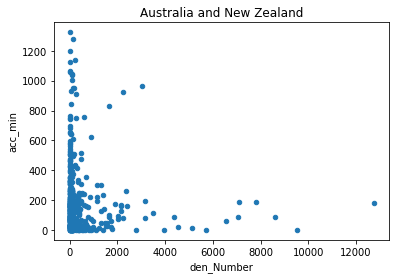

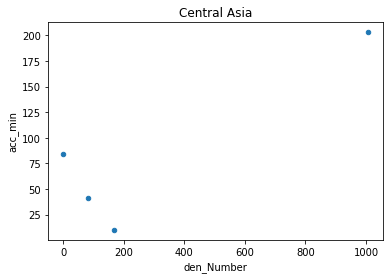

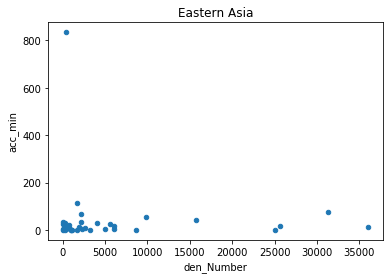

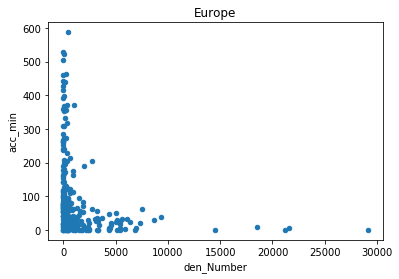

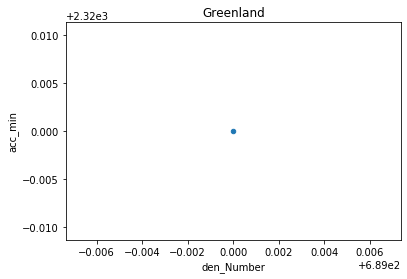

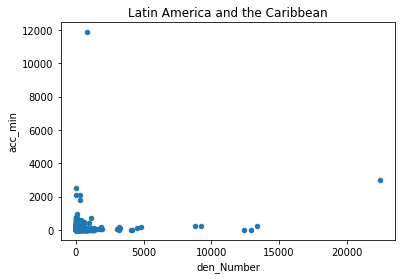

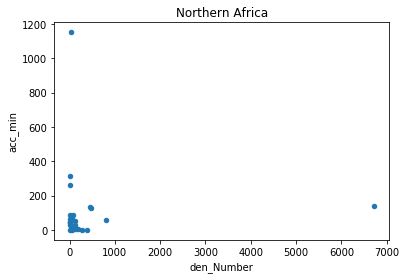

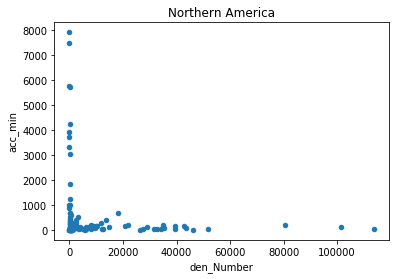

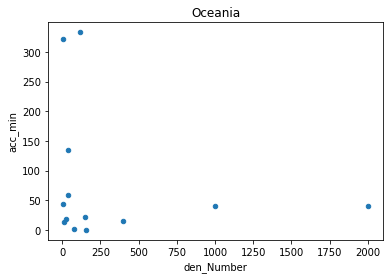

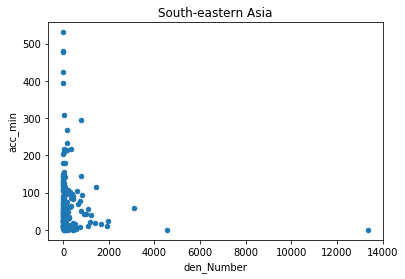

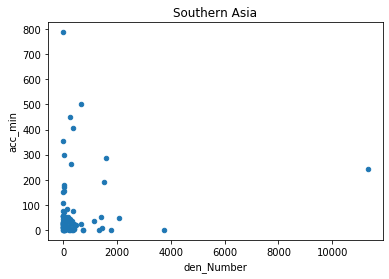

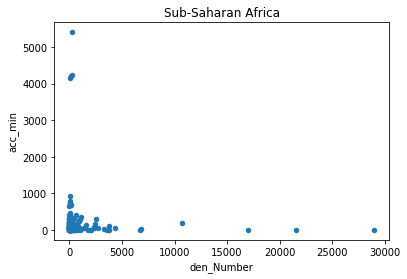

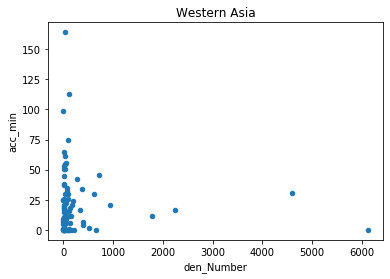

In [50]:
for key, region in regions:
    region.plot('den_Number', 'acc_min', kind='scatter', title=key)

In [43]:
for key, region in regions:
    print(key)
    print(region['acc_min'].corr(region['den_post_d']))
    print(region['Land_area'].corr(region['den_Number']))
    print("")

Australia and New Zealand
-0.05609795533662657
0.28359276308045467

Central Asia
-0.18156923676040287
0.9899976092996992

Eastern Asia
-0.06783564221586391
0.320488339627146

Europe
-0.114207876061652
0.10266219476669183

Greenland
nan
nan

Latin America and the Caribbean
0.003001422029173162
0.06837502572031244

Northern Africa
-0.05345010446883019
-0.07438540549191208

Northern America
-0.1556092124126437
-0.0065904645103447065

Oceania
-0.25790531714440096
0.39426008081887487

South-eastern Asia
-0.11427330668282988
-0.03190969591341507

Southern Asia
-0.08236820692232227
0.08173245828011554

Sub-Saharan Africa
0.239148050608379
0.3778491907704775

Western Asia
-0.05713531976653468
-0.054421602579837365



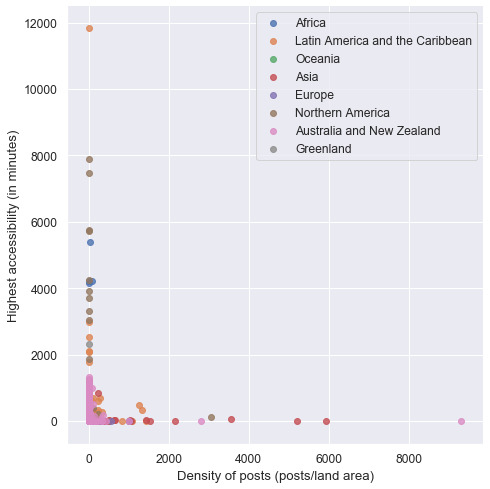

In [64]:
#plt.figure(figsize=(15,15))
sns.set(font_scale=1.1)
fig = sns.lmplot( x="den_post_1", y="acc_min", data=data_pd, fit_reg=False, hue='den_regi_1', legend=False, scatter=True,
                 height=7, aspect=1)
fig.set_axis_labels('Density of posts (posts/land area)', 'Highest accessibility (in minutes)')
plt.legend(loc='upper right')
fig.savefig('global_acc_and_dens_scatterplot.png')

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 0                                Africa
1                                Africa
2                                Africa
3                                Africa
4                                Africa
                     ...               
1962                             Europe
1963    Latin America and the Caribbean
1964    Latin America and the Caribbean
1965    Latin America and the Caribbean
1966    Latin America and the Caribbean
Name: den_regi_1, Length: 1967, dtype: object.

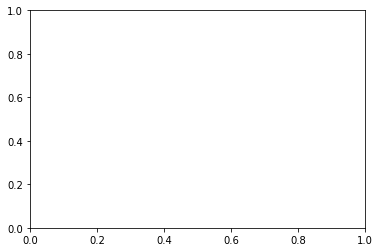

In [32]:
ax = data_pd.plot('den_post_1', 'acc_min', kind='scatter', title="", marker='H', c=data_pd['den_regi_1'])
ax.set_xlabel('Density of posts (posts/land area)')
ax.set_ylabel('Highest accessibility (in minutes)')


In [29]:
data_pd['den_post_1'].corr(data_pd['acc_min'])

-0.02160596700428597

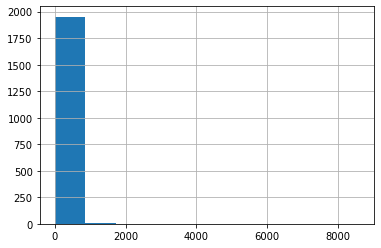

In [32]:
data_pd['den_post_d'].hist()

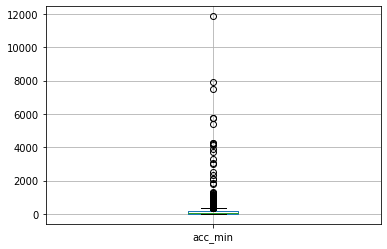

In [46]:
data_pd.boxplot("acc_min")

In [5]:
acc_dens_regional = pd.read_csv("C:\\path_to_regionally_aggregated_data\\density_accessibility_correlation_regional.csv")

In [8]:
acc_dens_regional

,Region,Post density (posts/km²),Accessibility median (Regional level)
0,Northern America,2.45,123.0
1,Australia and New Zealand,0.65,115.0
2,Sub-Saharan Africa,0.32,66.0
3,Latin America and the Caribbean,0.29,63.0
4,Central Asia,0.04,62.5
5,Northern Africa,0.11,49.0
6,South-eastern Asia,0.32,44.5
7,Europe,2.06,43.5
8,Oceania,0.37,41.0
9,Southern Asia,0.53,27.0


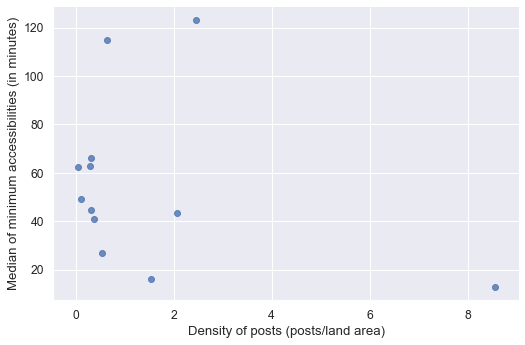

In [22]:
sns.set(font_scale=1.1)
fig = sns.lmplot( x="Post density (posts/km²)", y="Accessibility median (Regional level)", data=acc_dens_regional, fit_reg=False, legend=False, scatter=True,
                 height=5, aspect=1.5)
fig.set_axis_labels('Density of posts (posts/land area)', 'Median of minimum accessibilities (in minutes)')
#plt.legend(loc='upper right')
fig.savefig('regional_acc_and_dens_scatterplot.png')

In [28]:
acc_dens_regional['Accessibility median (Regional level)'].corr(acc_dens_regional['Post density (posts/km²)'])

-0.2889931061774536